In [1]:
import meep as mp
from meep import mpb

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

# 2 dimensional model

# Periodic dielectric waveguides

This model will be periodic in one direction only, which will lead to a Photonic Band Gap in this direction and to index guiding in the other direction.

We will havee a strips like this:

<img src="media/2D_model.png" width="700">

Both structures have translational symmetry in $X$, therefore $k_x$ is conserved.

## Band structure calculation

We fix the usual initialization parameters:

In [2]:
resolution = 32

Med_1 = mp.Medium(index=np.sqrt(12))
Med_2 = mp.Medium(index=1)

a = 1  #Arbitrary units

width = 0.4 * a

sc = 1 * a  
y_lim = 5


geometry_lattice = mp.Lattice(size=mp.Vector3(sc,y_lim))
geometry = [mp.Block(size=mp.Vector3(width, width),
            center=mp.Vector3(0.5*(width-sc),0), material=Med_1)]

In [3]:

cell_size = mp.Vector3(sc,y_lim)

sim = mp.Simulation(resolution=resolution,
                    cell_size= cell_size,
                    geometry=geometry)
sim.init_sim()
eps_data = sim.get_epsilon()

-----------
Initializing structure...
time for choose_chunkdivision = 1.19209e-05 s
Working in 2D dimensions.
Computational cell is 1 x 5 x 0 with resolution 32
     block, center = (-0.3,0,0)
          size (0.4,0.4,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0134909 s
-----------


We plot 3 unit cells to make sure the geometry is correct:

(-0.5, 95.5, 159.5, -0.5)

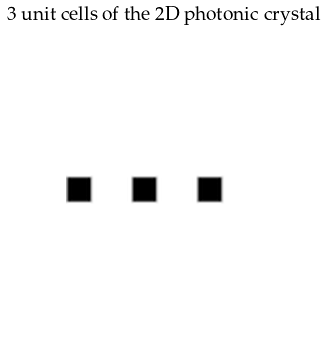

In [4]:
eps = np.concatenate([eps_data,eps_data,eps_data]).T #three unit cells in one direction

fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('3 unit cells of the 2D photonic crystal')
pos1 = ax1.imshow(eps, interpolation='spline36', cmap='binary')
ax1.axis('off')

We fix the $k$ points for our simulation:

In [5]:
num_bands = 10

num_k = 20
k_min = 0
k_max = 1

k_points = mp.interpolate(num_k, [mp.Vector3(k_min), mp.Vector3(k_max)])

We compute the bands:

In [6]:
ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry,
                    k_points=k_points,
                    resolution=resolution,
                    num_bands=num_bands);
ms.run();

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 160 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 5, 0)
     (0, 0, 1)
Cell volume = 5
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.2, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (-0.3,0,0)
          size (0.4,0.4,0)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 2 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
22 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.047619047619047616, 0.0, 0.0>
  Vector3<0.09523809523809523, 0.0, 0.0>
  Vector3<0.14285714285714285, 0.0, 0.0>
  Vector3<0.19047619047619047, 0.0, 0.0>
  Vector3<0.23809523809523808, 0.0, 0.0>
  Vector3<0.2857142857142857, 0.0, 0.0>
  Vector3<0.3333333333333333, 0.0

We retrieve the bands from the file:

In [45]:
import os
path = os.path.abspath(os.getcwd())
print(path)

/home/ben/Desktop/Thesis/github/Thesis_name/Simulations/03_Periodic_Dielectric_Waveguides/2D_model


In [50]:
f = np.genfromtxt(path+"/data/model_bands.dat", delimiter=",")[:,1:]

In [51]:
print(np.shape(f))

(155, 11)


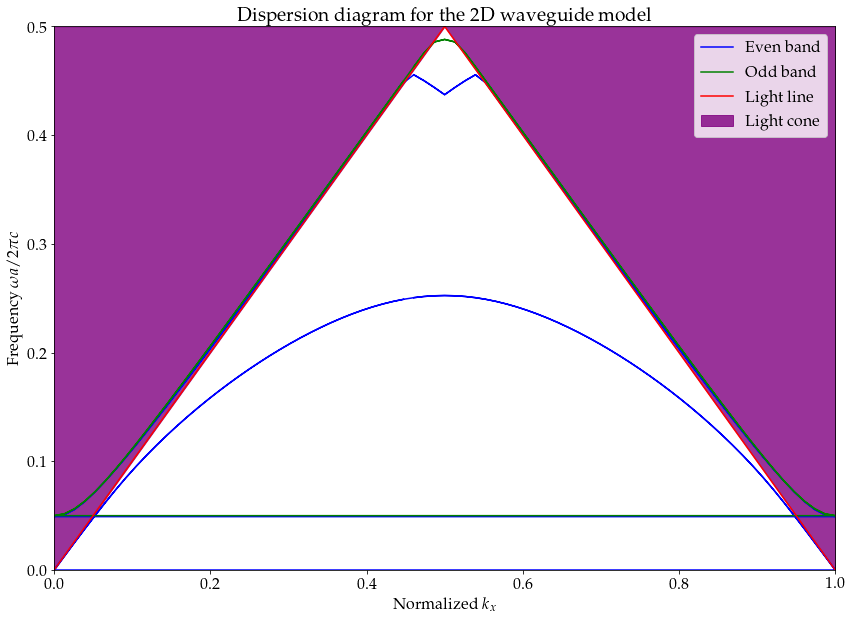

In [54]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(f[:,1], f[:,-6], c = 'blue', label='Even band') 
ax.plot(f[:,1], f[:,-2], c = 'blue') 
ax.plot(f[:,1], f[:,-2], c='green', label ='Odd band') 

ax.plot(np.linspace(0,0.5,100),np.linspace(0,0.5,100), c='r', label ='Light line')
ax.plot(np.linspace(0.5,1.0,100),1-np.linspace(0.5,1.0,100), c='r')
ax.fill_between(np.linspace(0,0.5,100), np.linspace(0,0.5,100), 0.5*np.ones(100), color='purple', alpha=0.8, label='Light cone') 
ax.fill_between(np.linspace(0.5,1,100), 1-np.linspace(0.5,1,100), 0.5*np.ones(100), color='purple', alpha=0.8) 

ax.set_title('Dispersion diagram for the 2D waveguide model')
ax.set_xlabel("Normalized $k_x$")
ax.set_ylabel("Frequency $\omega a / 2 \pi c$")
ax.set_xlim([0,1])
ax.set_ylim([0,0.5])
ax.legend()

In [25]:
print(f[:,1])

[0.        0.047619  0.0952381 0.142857  0.190476  0.238095  0.285714
 0.333333  0.380952  0.428571  0.47619         nan 0.52381   0.571429
 0.619048  0.666667  0.714286  0.761905  0.809524  0.857143  0.904762
 0.952381  1.        0.        0.047619  0.0952381 0.142857  0.190476
 0.238095  0.285714  0.333333  0.380952  0.428571        nan 0.47619
 0.52381   0.571429  0.619048  0.666667  0.714286  0.761905  0.809524
 0.857143  0.904762  0.952381  1.       ]


In [26]:
print( f[:,-10])

[0.00000e+00 4.49802e-02 8.70518e-02 1.22763e-01 1.52901e-01 1.78899e-01
 2.01311e-01 2.20223e-01 2.35351e-01 2.46100e-01 2.51740e-01         nan
 2.51740e-01 2.46100e-01 2.35351e-01 2.20223e-01 2.01311e-01 1.78899e-01
 1.52901e-01 1.22763e-01 8.70518e-02 4.49802e-02 4.29576e-06 0.00000e+00
 4.49802e-02 8.70518e-02 1.22763e-01 1.52901e-01 1.78899e-01 2.01311e-01
 2.20223e-01 2.35351e-01 2.46100e-01         nan 2.51740e-01 2.51740e-01
 2.46100e-01 2.35351e-01 2.20223e-01 2.01311e-01 1.78899e-01 1.52901e-01
 1.22763e-01 8.70518e-02 4.49802e-02 4.29576e-06]


The Brioullin zone for the discontiguous strip is finite. The range between $\pi/a <k<2\pi/a$ is equivalent to $-\pi/a<k<0$ wich is the reverse of $0> k > \pi/a$. This leads to the apartition of a light cone. This also leads o a flattening at $\pi/a$ which bends downwards towards the end of the light cone. This causes a gap betweem the first two guided modes. This gap is however **incomplete** because guided modes are excluded from the gap, but radiating modes exist for any $\omega$.

## Electric fields for bands

In [31]:
resolution = 32
md = mpb.MPBData(rectify=True, periods=3, resolution=resolution)

In [32]:
eps = ms.get_epsilon()
converted_eps = md.convert(eps).T

epsilon: 1-12, mean 1.352, harm. mean 1.03303, 3.55469% > 1, 3.2% "fill"


In [33]:
print(np.shape(converted_eps))

(480, 96)


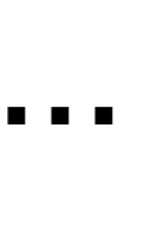

In [34]:
plt.imshow(converted_eps[:160,:], interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

In [35]:
ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=[mp.Vector3(0.5,0.0)],
    resolution=resolution,
    num_bands=num_bands
)

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 160 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 5, 0)
     (0, 0, 1)
Cell volume = 5
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.2, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (-0.3,0,0)
          size (0.4,0.4,0)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 2 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.05308270454406738
solve_kpoint (0.5,0,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 34 iterations.
freqs:, 1, 0.5, 0, 0, 0.5, 0.252459, 0.426621, 0.436882, 0.437071, 0.488991, 0.510794, 0.511224, 0.513318, 0.516774, 0

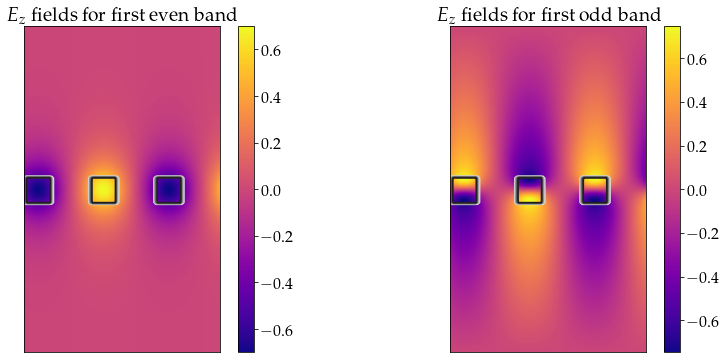

In [36]:
efields = []

def get_efields(ms, band):
    efields.append(ms.get_efield(band, bloch_phase=True))

ms.run(mpb.output_at_kpoint(mp.Vector3(0.5, 0.0), mpb.fix_efield_phase,
          get_efields))

# Create an MPBData instance to transform the dfields
md = mpb.MPBData(rectify=True, resolution=resolution, periods=3)

converted = []
for f in efields:
    # Get just the z component of the dfields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

fig2, ax2 = plt.subplots(1,2,figsize=(14,6))
ax2[0].set_title('$E_z$ fields for first even band')
ax2[1].set_title('$E_z$ fields for first odd band')
ax2[0].contour(converted_eps[:160,:], cmap='binary')
ax2[1].contour(converted_eps[:160,:], cmap='binary')
posd1 = ax2[0].imshow(np.real(converted[0].T[:160,:]), interpolation='spline36', cmap='plasma')
posd2 = ax2[1].imshow(np.real(converted[4].T[:160,:]), interpolation='spline36', cmap='plasma')
ax2[0].set_xticks([])
ax2[0].set_xticklabels([]);
ax2[0].set_yticks([])
ax2[0].set_yticklabels([]);
ax2[1].set_xticks([])
ax2[1].set_xticklabels([]);
ax2[1].set_yticks([])
ax2[1].set_yticklabels([]);
fig.colorbar(posd1,ax=ax2[0])
fig.colorbar(posd2,ax=ax2[1])

In [37]:
fig.savefig("media/2D_model_fields.pdf")

As we can see the odd mode has a higher frequency than the even one, which in turn leads to the band gap.  It is important to note that periodic dielectric waveguides have a finite amount of guided bands because frequencies rise and are pulled out to the light cone. There is as an upper frequency cutoff at $\omega=c\pi/a$.